## Mass Balance 
1. $\frac{dc_1}{dt} = -0.12c_1 +0.02c_3+1$
2. $\frac{dc_2}{dt} = 0.15c_1 -0.15c_2$
3. $\frac{dc_3}{dt} = 0.025c_2 - 0.225c_3 + 4$
4. $\frac{dc_4}{dt} = 0.0125c_2 + 0.1c_3 + 0.025c_5 -0.1375c_4$
5. $\frac{dc_5}{dt} = 0.03c_1+ 0.01c_2 - 0.04c_5$

---- Time Step h = 5 ----

Iteration 1 with time step h=5:
t = 5.0 minutes
c1 = 4.3737, c2 = 1.3410, c3 = 11.8198, c4 = 3.0709, c5 = 0.3395

Iteration 2 with time step h=5:
t = 10.0 minutes
c1 = 7.2606, c2 = 3.8558, c3 = 15.9760, c4 = 7.0594, c5 = 1.2067

---- Time Step h = 10 ----

Iteration 1 with time step h=10:
t = 10.0 minutes
c1 = 8.1788, c2 = 3.7062, c3 = 9.7422, c4 = 12.8637, c5 = 1.0813

Iteration 2 with time step h=10:
t = 20.0 minutes
c1 = 10.5567, c2 = 7.6433, c3 = 14.9474, c4 = 15.5268, c5 = 3.5111


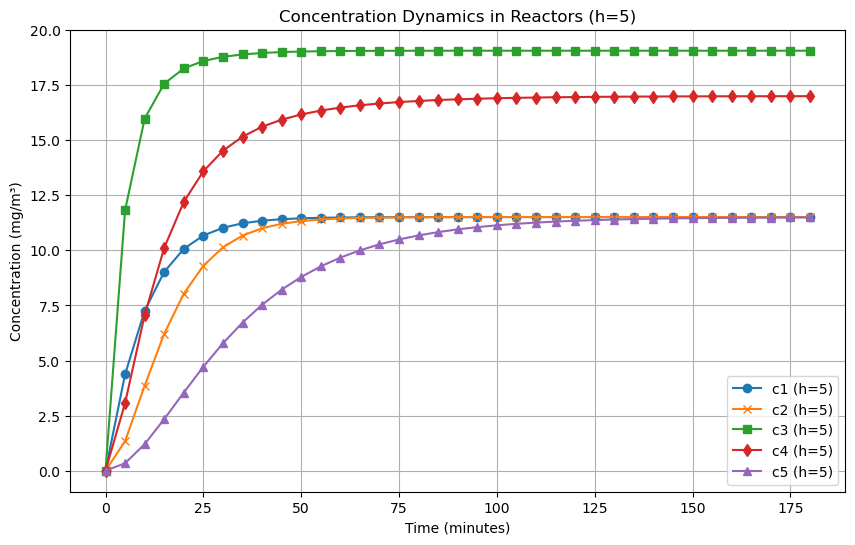

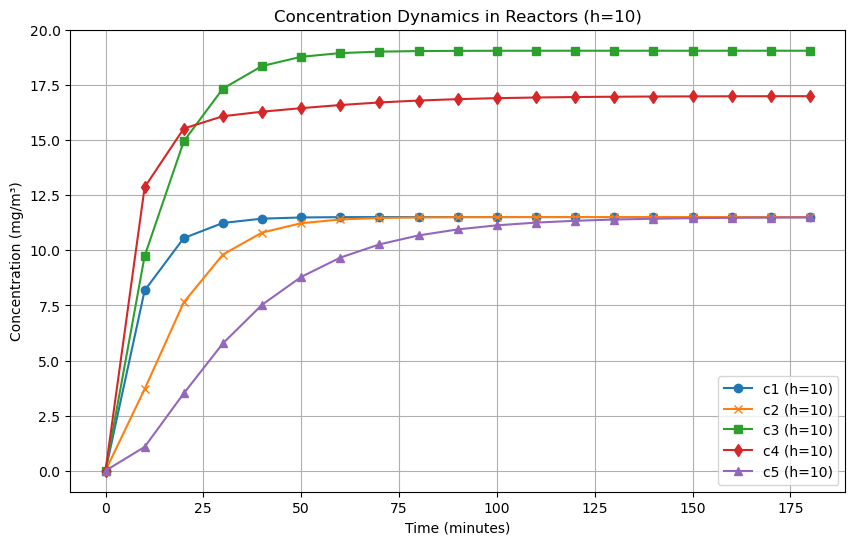

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of ODEs based on the new mass balance equations
def reactor_system(t, C):
    c1, c2, c3, c4, c5 = C
    dc1_dt = -0.12 * c1 + 0.02 * c3 + 1
    dc2_dt = 0.15 * c1 - 0.15 * c2
    dc3_dt = 0.025 * c2 - 0.225 * c3 + 4
    dc4_dt = 0.0125 * c2 + 0.1 * c3 + 0.025 * c5 - 0.1375 * c4
    dc5_dt = 0.03 * c1 + 0.01 * c2 - 0.04 * c5
    return np.array([dc1_dt, dc2_dt, dc3_dt, dc4_dt, dc5_dt])

# Runge-Kutta 4th order method
def rk4_step(f, t, C, h):
    k1 = f(t, C)
    k2 = f(t + 0.5 * h, C + 0.5 * h * k1)
    k3 = f(t + 0.5 * h, C + 0.5 * h * k2)
    k4 = f(t + h, C + h * k3)
    C_next = C + (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    C_next = np.maximum(C_next, 0)  # Set negative concentrations to 0 as they are not physically possible
    return C_next

# Function to simulate the system for a given time step
def simulate_reactors(h, total_time=180):
    time_steps = int(total_time / h)  # Number of steps based on time step
    t_values = np.linspace(0, total_time, time_steps + 1)
    C0 = np.array([0, 0, 0, 0, 0])  # Initial concentrations
    
    # Store concentration values at each step
    C_values = np.zeros((time_steps + 1, 5))  
    C_values[0] = C0
    
    # Solve the system over time
    for i in range(time_steps):
        C_values[i+1] = rk4_step(reactor_system, t_values[i], C_values[i], h)
        
        # Print first two iterations' values
        if i < 2:
            print(f"\nIteration {i+1} with time step h={h}:")
            print(f"t = {t_values[i+1]} minutes")
            print(f"c1 = {C_values[i+1, 0]:.4f}, c2 = {C_values[i+1, 1]:.4f}, c3 = {C_values[i+1, 2]:.4f}, c4 = {C_values[i+1, 3]:.4f}, c5 = {C_values[i+1, 4]:.4f}")
    
    return t_values, C_values

# Time steps h = 5 and h = 10
print("---- Time Step h = 5 ----")
t_values_5, C_values_5 = simulate_reactors(h=5)

print("\n---- Time Step h = 10 ----")
t_values_10, C_values_10 = simulate_reactors(h=10)

# Plotting the results for h = 5
c1_values_5 = C_values_5[:, 0]
c2_values_5 = C_values_5[:, 1]
c3_values_5 = C_values_5[:, 2]
c4_values_5 = C_values_5[:, 3]
c5_values_5 = C_values_5[:, 4]

plt.figure(figsize=(10, 6))
plt.plot(t_values_5, c1_values_5, label='c1 (h=5)', marker='o')
plt.plot(t_values_5, c2_values_5, label='c2 (h=5)', marker='x')
plt.plot(t_values_5, c3_values_5, label='c3 (h=5)', marker='s')
plt.plot(t_values_5, c4_values_5, label='c4 (h=5)', marker='d')
plt.plot(t_values_5, c5_values_5, label='c5 (h=5)', marker='^')
plt.xlabel('Time (minutes)')
plt.ylabel('Concentration (mg/m³)')
plt.title('Concentration Dynamics in Reactors (h=5)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the results for h = 10
c1_values_10 = C_values_10[:, 0]
c2_values_10 = C_values_10[:, 1]
c3_values_10 = C_values_10[:, 2]
c4_values_10 = C_values_10[:, 3]
c5_values_10 = C_values_10[:, 4]

plt.figure(figsize=(10, 6))
plt.plot(t_values_10, c1_values_10, label='c1 (h=10)', marker='o')
plt.plot(t_values_10, c2_values_10, label='c2 (h=10)', marker='x')
plt.plot(t_values_10, c3_values_10, label='c3 (h=10)', marker='s')
plt.plot(t_values_10, c4_values_10, label='c4 (h=10)', marker='d')
plt.plot(t_values_10, c5_values_10, label='c5 (h=10)', marker='^')
plt.xlabel('Time (minutes)')
plt.ylabel('Concentration (mg/m³)')
plt.title('Concentration Dynamics in Reactors (h=10)')
plt.legend()
plt.grid(True)
plt.show()